# Week 6: Data Wrangling in R

POP77001 Computer Programming for Social Scientists

Tom Paskhalis

## Overview

-   Data frames in base R
-   Alternatives to data frames
-   `tidyverse` packages
-   Working with tabular data
-   Data input and output
-   Summary statistics

# Rectangular Data

## Tidy Data

-   Tidy data is a specific subset of rectangular data, where:
    -   Each variable is in a column
    -   Each observation is in a row
    -   Each value is in a cell

<figure>
<img src="https://r4ds.hadley.nz/images/tidy-1.png"
alt="R for Data Science" />
<figcaption aria-hidden="true"><a
href="https://r4ds.hadley.nz/data-tidy#sec-tidy-data">R for Data
Science</a></figcaption>
</figure>

## Data Frames

-   Data frame is one of the object types available in base R.
-   Despite their matrix-like appearance, data frames are <u>lists of
    equal-sized vectors</u>.
-   Data frames can be created with `data.frame()` function with named
    vectors as input.

. . .

In [ ]:
df <- data.frame(
    x = 1:4,
    y = c("a", "b", "c", "d"),
    z = c(TRUE, FALSE, FALSE, TRUE)
)
df

  x y     z
1 1 a  TRUE
2 2 b FALSE
3 3 c FALSE
4 4 d  TRUE

## Data Frame: Example

In [ ]:
# str() function applied to data frame is useful in determining variable types
str(df)

'data.frame':   4 obs. of  3 variables:
 $ x: int  1 2 3 4
 $ y: chr  "a" "b" "c" "d"
 $ z: logi  TRUE FALSE FALSE TRUE

. . .

In [ ]:
# dim() function behaves similar to matrix, showing N rows and N columns, respectively
dim(df)

[1] 4 3

. . .

In [ ]:
# Note that nrow() function is just a convenient wrapper for dim()[1L]
nrow

function (x) 
dim(x)[1L]
<bytecode: 0x5b271a4155c8>
<environment: namespace:base>

. . .

In [ ]:
# Same with ncol() which is a wrapper for dim()[2L]
ncol

function (x) 
dim(x)[2L]
<bytecode: 0x5b2719b42cb0>
<environment: namespace:base>

. . .

In [ ]:
# In contrast to matrix length() of data frame displays the length of underlying list
length(df)

[1] 3

# Working with<br>Data Frames

## Creating Data Frame: Example

In [ ]:
l <- list(x = 1:5, y = letters[1:5], z = rep(c(TRUE, FALSE), length.out = 5))
l

$x
[1] 1 2 3 4 5

$y
[1] "a" "b" "c" "d" "e"

$z
[1]  TRUE FALSE  TRUE FALSE  TRUE

. . .

In [ ]:
df <- data.frame(l)
df

  x y     z
1 1 a  TRUE
2 2 b FALSE
3 3 c  TRUE
4 4 d FALSE
5 5 e  TRUE

. . .

In [ ]:
str(df)

'data.frame':   5 obs. of  3 variables:
 $ x: int  1 2 3 4 5
 $ y: chr  "a" "b" "c" "d" ...
 $ z: logi  TRUE FALSE TRUE FALSE TRUE

## Subsetting Data Frame

-   In subsetting data frames the techniques of subsetting matrices and
    lists are combined:
    -   If you subset with a single vector, it behaves as a list
    -   If you subset with two vectors, it behaves as a matrix

. . .

    data.frame[[index]]

    data.frame[index]

    data.frame$name

    data.frame[vector_1, vector_2]

## Subsetting Data Frame: Example

In [ ]:
# Like a list
df[[c("z")]]

[1]  TRUE FALSE  TRUE FALSE  TRUE

. . .

In [ ]:
df[c("z")]

      z
1  TRUE
2 FALSE
3  TRUE
4 FALSE
5  TRUE

. . .

In [ ]:
df[c("x", "z")]

  x     z
1 1  TRUE
2 2 FALSE
3 3  TRUE
4 4 FALSE
5 5  TRUE

. . .

In [ ]:
# Like a matrix
df[,c("x", "z")]

  x     z
1 1  TRUE
2 2 FALSE
3 3  TRUE
4 4 FALSE
5 5  TRUE

. . .

In [ ]:
df[df$y == "b",]

  x y     z
2 2 b FALSE

## Building Data Frame

-   `rbind()` (row bind) - appends a row to data frame
-   `cbind()` (column bind) - appends a column to data frame
-   Both require compatible sizes (number of rows/columns)

## Adding Columns

-   Recall that a column is just a vector.

In [ ]:
rand <- rnorm(5)
rand

[1]  0.04275987 -1.03179384  0.53104058  0.13727148  1.03110998

. . .

In [ ]:
df <- cbind(df, rand)
df

  x y     z        rand
1 1 a  TRUE  0.04275987
2 2 b FALSE -1.03179384
3 3 c  TRUE  0.53104058
4 4 d FALSE  0.13727148
5 5 e  TRUE  1.03110998

. . .

Or simply:

In [ ]:
df$rand <- rand
df

  x y     z        rand
1 1 a  TRUE  0.04275987
2 2 b FALSE -1.03179384
3 3 c  TRUE  0.53104058
4 4 d FALSE  0.13727148
5 5 e  TRUE  1.03110998

## Adding Rows

Note that a row has to be a list as it contains different data types.

. . .

In [ ]:
r <- list(6, letters[6], FALSE, rnorm(1))
r

[[1]]
[1] 6

[[2]]
[1] "f"

[[3]]
[1] FALSE

[[4]]
[1] -1.08291

. . .

In [ ]:
df <- rbind(df, r)
df

  x y     z        rand
1 1 a  TRUE  0.04275987
2 2 b FALSE -1.03179384
3 3 c  TRUE  0.53104058
4 4 d FALSE  0.13727148
5 5 e  TRUE  1.03110998
6 6 f FALSE -1.08291022

# Beyond Data Frames

## Revisiting Assignment

-   In R creating (binding) another name (alias) to an object does not
    create a copy of the object.
-   Instead, it creates another name for the same object.

. . .

In [ ]:
df1 <- data.frame(A = c(1, 3, 5), B = c(2, 4, 6))
df1

  A B
1 1 2
2 3 4
3 5 6

. . .

In [ ]:
# We can use tracemem() function to trace the memory address of an object
tracemem(df1)

[1] "<0x5b272272eee8>"

. . .

In [ ]:
df2 <- df1

. . .

In [ ]:
tracemem(df2)

[1] "<0x5b272272eee8>"

## Copy-on-modify Semantics

-   When an object is modified, R creates a copy of the object and
    modifies the copy.
-   The original object remains unchanged.
-   Another way to think about this is that R objects are **immutable**.

``` r
tracemem(df1)
```

    [1] "<0x5b272272eee8>"

``` r
tracemem(df2)
```

    [1] "<0x5b272272eee8>"

``` r
df2$C <- c(7, 8, 9)
```

``` r
df1
```

      A B
    1 1 2
    2 3 4
    3 5 6

``` r
tracemem(df1)
```

    [1] "<0x5b272272eee8>"

``` r
df2
```

      A B C
    1 1 2 7
    2 3 4 8
    3 5 6 9

``` r
tracemem(df2)
```

    [1] "<0x5b272285ed48>"

## Data Frame Limitations

-   While very versatile (and available out-of-the-box) data frames have
    their drawbacks:
    -   Individual cells (observations) cannot themselves be lists;
    -   Somewhat limited (and inconsistent) data manipulation functions;
    -   Memory inefficient (**copy-on-modify** semantics);
    -   No parallelisation.

## Data Frame Alternatives

-   Two major alternatives to/enhanced versions of data frames are:
    -   `tibble` from `tibble` package (part of `tidyverse` package
        ecosystem)
    -   `data.table` from `data.table`
-   `tibble` provides features enhancing user experience (readability,
    ease of manipulation)
-   `data.table` provides speed

## Data Table - Fast Data Frame

-   As opposed to data frames, data tables are updated by reference.
-   This frees up a lot of RAM for big data!
-   It provides low-level parallelism.
-   SQL-like operations for data manipulation.
-   Has no external dependencies (other than base R itself).

. . .

In [ ]:
library("data.table")

. . .

In [ ]:
dt <- data.table::data.table(
    x = 1:4,
    y = c("a", "b", "c", "d"),
    z = c(TRUE, FALSE, FALSE, TRUE)
)
dt

       x      y      z
   <int> <char> <lgcl>
1:     1      a   TRUE
2:     2      b  FALSE
3:     3      c  FALSE
4:     4      d   TRUE

## Data Table: Example

-   The syntax of `data.table()` might be a bit confusing at first.

In [ ]:
dt[,z]

[1]  TRUE FALSE FALSE  TRUE

. . .

In [ ]:
dt[,.(z)]

        z
   <lgcl>
1:   TRUE
2:  FALSE
3:  FALSE
4:   TRUE

. . .

In [ ]:
dt[,.(x, z)]

       x      z
   <int> <lgcl>
1:     1   TRUE
2:     2  FALSE
3:     3  FALSE
4:     4   TRUE

. . .

In [ ]:
dt[y == "b",]

       x      y      z
   <int> <char> <lgcl>
1:     2      b  FALSE

## `tidyverse` packages

-   `tidyverse` [package ecosystem](https://www.tidyverse.org/) - rich
    collection of data science packages.
-   Designed with consistent interfaces and generally higher usability
    than base R function.
-   Notable packages:
    -   `readr` - data input/output (also `readxl` for spreadsheets,
        `haven` for SPSS/Stata)
    -   `dplyr` - data manipulation (also `tidyr` for pivoting)
    -   `ggplot2` - data visualisation
    -   `lubridate` - working with dates and time
    -   `tibble` - enhanced data frame

## Tibble - User-friendly Data Frame

-   Tibbles are designed to be backward compatible with base R data
    frames.
-   Console printing of tibbles is cleaner (prettified, only first 10
    rows by default).
-   Tibbles can have columns that themselves contain lists as elements.
-   Seamless integration with the `tidyverse` ecosystem.

. . .

In [ ]:
library("tibble")

. . .

In [ ]:
tb <- tibble::tibble(
    x = 1:4,
    y = c("a", "b", "c", "d"),
    z = c(TRUE, FALSE, FALSE, TRUE)
)
tb

# A tibble: 4 × 3
      x y     z    
  <int> <chr> <lgl>
1     1 a     TRUE 
2     2 b     FALSE
3     3 c     FALSE
4     4 d     TRUE 

## Tibble: Example

-   Tibbles work (mostly) like data frames

In [ ]:
str(tb)

tibble [4 × 3] (S3: tbl_df/tbl/data.frame)
 $ x: int [1:4] 1 2 3 4
 $ y: chr [1:4] "a" "b" "c" "d"
 $ z: logi [1:4] TRUE FALSE FALSE TRUE

. . .

In [ ]:
dim(tb)

[1] 4 3

. . .

In [ ]:
tb[c("x", "z")]

# A tibble: 4 × 2
      x z    
  <int> <lgl>
1     1 TRUE 
2     2 FALSE
3     3 FALSE
4     4 TRUE 

. . .

In [ ]:
tb[tb$y == "b",]

# A tibble: 1 × 3
      x y     z    
  <int> <chr> <lgl>
1     2 b     FALSE

# Data Manipulation

# Data Wrangling

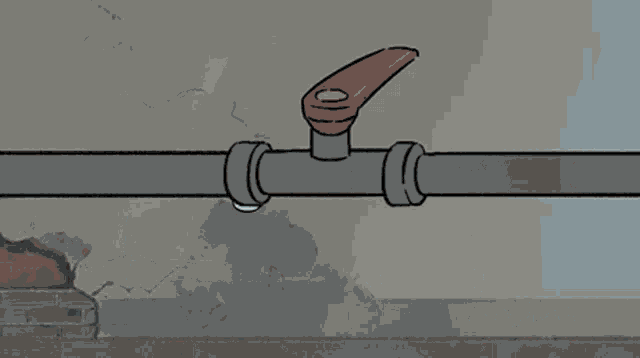

## Data Manipulation With `dplyr`

-   `dplyr` - is one of the core packages for data manipulation in
    `tidyverse`
-   Its principal functions are:
    -   `filter()` - subset rows from data
    -   `mutate()` - add new/modify existing variables
    -   `rename()` - rename existing variable
    -   `select()` - subset columns from data
    -   `arrange()` - order data by some variable

. . .

-   For data summary:
    -   `group_by()` - aggregate data by some variable
    -   `summarise()` - create a summary of aggregated variables

. . .

In [ ]:
library("dplyr")

## `dplyr`: Subsetting

. . .

In [ ]:
dplyr::filter(tb, y == 'b', z == FALSE)

# A tibble: 1 × 3
      x y     z    
  <int> <chr> <lgl>
1     2 b     FALSE

. . .

In [ ]:
# Note that dplyr functions do not require enquoted variable names
dplyr::select(tb, x, z)

# A tibble: 4 × 2
      x z    
  <int> <lgl>
1     1 TRUE 
2     2 FALSE
3     3 FALSE
4     4 TRUE 

## `dplyr`: Modifying Columns

. . .

In [ ]:
# Data is not modified in-place, you need to re-assign the results
tb <- dplyr::mutate(tb, rand = rnorm(4))
tb

# A tibble: 4 × 4
      x y     z       rand
  <int> <chr> <lgl>  <dbl>
1     1 a     TRUE   1.93 
2     2 b     FALSE -0.218
3     3 c     FALSE  0.930
4     4 d     TRUE   1.21 

. . .

In [ ]:
tb <- dplyr::rename(tb, random = rand)

. . .

In [ ]:
# We can also use helpful tidyselect functions for more complex rules
dplyr::select(tb, tidyselect::starts_with('r'))

# A tibble: 4 × 1
  random
   <dbl>
1  1.93 
2 -0.218
3  0.930
4  1.21 

## `%>%` Operator

-   Users of `tidyverse` packages are encouraged to use pipe operator
    `%>%`.
-   It allows to chain data transformations without creating
    intermediate variables.
-   It passes the result of the previous operation as a first first
    argument to the next.
-   Base R now also includes its own pipe operator `|>` but it is still
    not used as widely.

. . .

    <result> <- <input> %>%
      <function_name>(., arg_1, arg_2, ..., arg_n)

    <result> <- <input> %>%
      <function_name>(arg_1, arg_2, ..., arg_n)

## `%>%` Operator: Example

In [ ]:
tb

# A tibble: 4 × 4
      x y     z     random
  <int> <chr> <lgl>  <dbl>
1     1 a     TRUE   1.93 
2     2 b     FALSE -0.218
3     3 c     FALSE  0.930
4     4 d     TRUE   1.21 

. . .

In [ ]:
tb <- tb %>%
  dplyr::mutate(random2 = rnorm(4)) %>%
  dplyr::filter(z == FALSE)

. . .

In [ ]:
tb

# A tibble: 2 × 5
      x y     z     random random2
  <int> <chr> <lgl>  <dbl>   <dbl>
1     2 b     FALSE -0.218  0.0545
2     3 c     FALSE  0.930  0.598 

## `%>%` vs `|>` Operator

-   Since R version 4.1.0, there is a built-in `|>` (pipe) operator.

. . .

In [ ]:
# Pipe %>% can also be used with non-dplyr functions
# Analogous to tb$x %>% `[`(2)
tb$x %>% .[2]

[1] 3

. . .

In [ ]:
# Base R pipe operator |> is more restrictive
# E.g. tb$x |> `[`(2) doesn't work
# As well as other functions that act as infix operators
tb |> nrow()

[1] 2

## Pivoting Data

-   Sometimes you want to pivot you data by:
    -   Spreading some variable across columns (`tidyr::pivot_wider()`)
    -   Gathering some columns in a variable pair
        (`tidyr::pivot_longer()`)

![[R for Data
Science](https://r4ds.had.co.nz/tidy-data.html?q=pivot#pivoting)](attachment:../imgs/pivot_wider.png)
pivot_wider()

![[R for Data
Science](https://r4ds.had.co.nz/tidy-data.html?q=pivot#pivoting)](attachment:../imgs/pivot_longer.png)
pivot_longer()

## Pivoting Data: Example
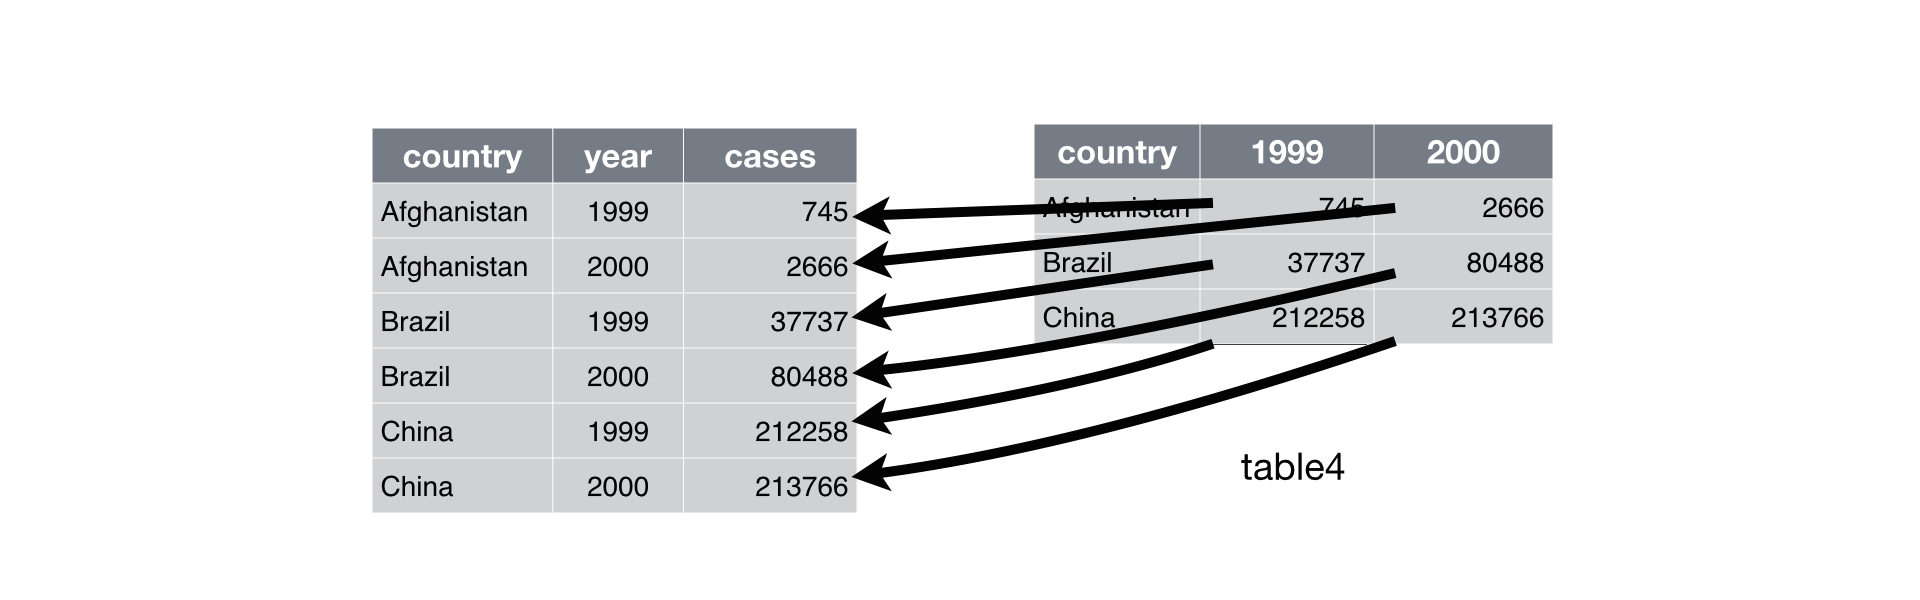
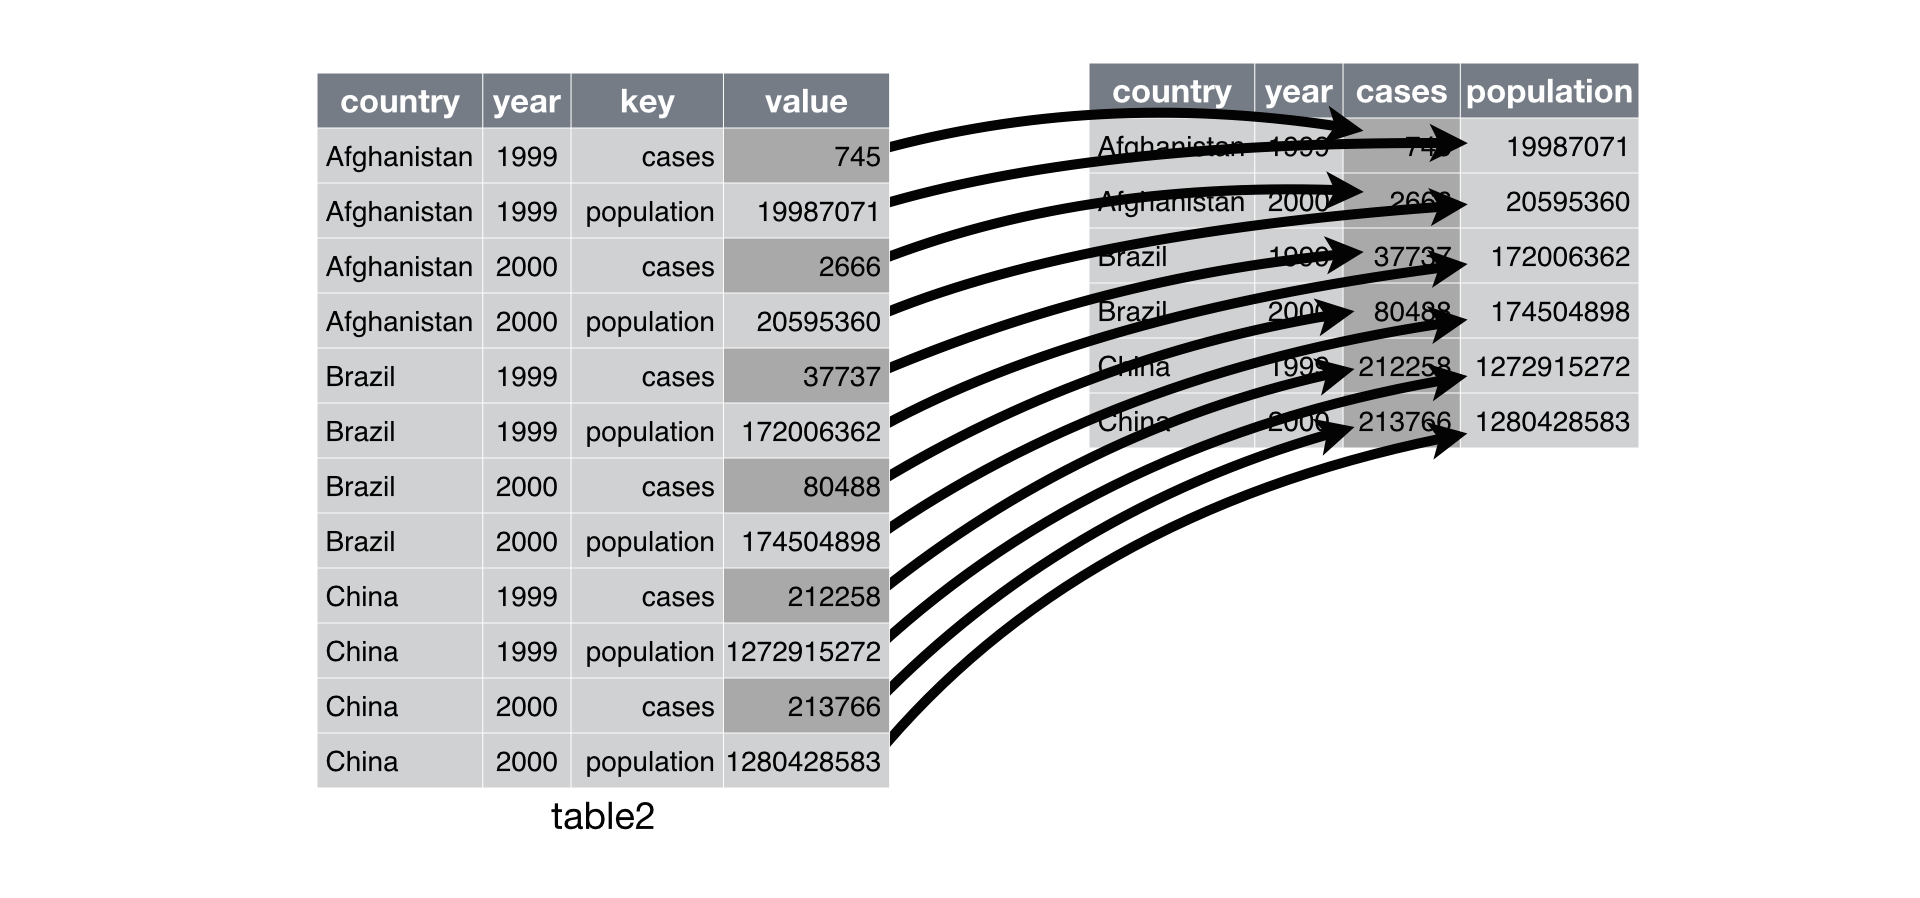

In [ ]:
tb2 <- tibble::tibble(
  country = c("Afghanistan", "Brazil"),
  `1999` = c(745, 2666),
  `2000` = c(37737, 80488)
)
tb2

# A tibble: 2 × 3
  country     `1999` `2000`
  <chr>        <dbl>  <dbl>
1 Afghanistan    745  37737
2 Brazil        2666  80488

. . .

In [ ]:
tb2 <- tb2 %>%
  # Note that pivoting functions come 'tidyr' package
  tidyr::pivot_longer(
      cols = c("1999", "2000"),
      names_to = "year",
      values_to = "cases"
  )
tb2

# A tibble: 4 × 3
  country     year  cases
  <chr>       <chr> <dbl>
1 Afghanistan 1999    745
2 Afghanistan 2000  37737
3 Brazil      1999   2666
4 Brazil      2000  80488

. . .

In [ ]:
tb2 <- tb2 %>%
  tidyr::pivot_wider(names_from = "year", values_from = "cases")
tb2

# A tibble: 2 × 3
  country     `1999` `2000`
  <chr>        <dbl>  <dbl>
1 Afghanistan    745  37737
2 Brazil        2666  80488

# Data I/O

## Data Formats

| Format | Readability | Platform | Speed | Compression | Persistence |
|:---------|:---------------|:---------------|:-------|:----------|:------------|
| `csv` | ✅ Human-readable | ✅ Cross-platform | ❌ Slow | ❌ No | ✅ Long-term |
| `rds` | ❌ Binary | ❌ R only | ✅ Fast | ✅ Yes | ✅ Long-term |
| `pickle` | ❌ Binary | ❌ Python only | ✅ Fast | ✅ Yes | ✅ Long-term |
| `parquet` | ❌ Binary | ✅ Cross-platform | ✅ Fast | ✅ Yes | ✅ Long-term |
| `feather` | ❌ Binary | ✅ Cross-platform | ✅ Fast | ✅ Yes | ❌ Short-term |

## Data I/O in R

-   `.csv` (Comma-separated value)
    -   `read.csv()`/`write.csv()` - base R functions
    -   `readr::read_csv()`/`readr::write_csv()` - functions from
        `readr` package in `tidyverse`
-   `.rds` (R data serialization)
    -   `readRDS()`/`writeRDS()` - base R functions
    -   `readr::read_rds()`/`readr::write_rds()` - functions from
        `readr` (no default compression)
-   `.rda` (R data)
    -   `save()`/`load()` - base R functions
-   `.feather`/`.parquet`
    -   `arrow::read_feather()`/`arrow::write_feather()` - functions
        from
    -   `arrow::read_parquet()`/`arrow::write_parquet()` - `arrow`
        package in [Apache
        Arrow](https://github.com/apache/arrow/tree/master/r)

## Data In: Example

In [ ]:
# We are skipping the first row as this dataset has
# a composite header of 2 rows (variable name, question)
kaggle2022 <- readr::read_csv(
  '../data/kaggle_survey_2022_responses.csv',
  skip = 1
)

e.g.:
  dat <- vroom(...)
  problems(dat)

Rows: 23997 Columns: 296
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (288): What is your age (# years)?, What is your gender? - Selected Choi...
dbl   (3): Duration (in seconds), Do you use any tools to help monitor your ...
lgl   (5): Which of the following cloud computing platforms do you use? (Sel...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

. . .

In [ ]:
head(kaggle2022[,1:10])

# A tibble: 6 × 10
  `Duration (in seconds)` `What is your age (# years)?` What is your gender? -…¹
                    <dbl> <chr>                         <chr>                   
1                     121 30-34                         Man                     
2                     462 30-34                         Man                     
3                     293 18-21                         Man                     
4                     851 55-59                         Man                     
5                     232 45-49                         Man                     
6                     277 18-21                         Woman                   
# ℹ abbreviated name: ¹​`What is your gender? - Selected Choice`
# ℹ 7 more variables: `In which country do you currently reside?` <chr>,
#   `Are you currently a student? (high school, university, or graduate)` <chr>,
#   `On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choic

## Summarizing Numeric Variables

In [ ]:
# Note that summary() gives summary for all variable types by default
summary(kaggle2022[,1:10])

 Duration (in seconds) What is your age (# years)?
 Min.   :    120       Length:23997               
 1st Qu.:    264       Class :character           
 Median :    414       Mode  :character           
 Mean   :  10090                                  
 3rd Qu.:    715                                  
 Max.   :2533678                                  
 What is your gender? - Selected Choice
 Length:23997                          
 Class :character                      
 Mode  :character                      
                                       
                                       
                                       
 In which country do you currently reside?
 Length:23997                             
 Class :character                         
 Mode  :character                         
                                          
                                          
                                          
 Are you currently a student? (high school, university, or gra

## Summarizing Categorical Variables

In [ ]:
table(kaggle2022[3])

What is your gender? - Selected Choice
                    Man               Nonbinary       Prefer not to say 
                  18266                      78                     334 
Prefer to self-describe                   Woman 
                     33                    5286 

. . .

In [ ]:
# Wrapping table() output inside prop.table()
# gives proportions of each category
prop.table(table(kaggle2022[3]))

What is your gender? - Selected Choice
                    Man               Nonbinary       Prefer not to say 
            0.761178481             0.003250406             0.013918406 
Prefer to self-describe                   Woman 
            0.001375172             0.220277535 

. . .

In [ ]:
# Wrapping it inside sort() gives value sorting,
# as opposed to alphabetic (or de facto levels)
sort(table(kaggle2022[3]), decreasing = TRUE)[1]

  Man 
18266 

## Data Out: Example

In [ ]:
readr::write_csv(kaggle2022, '../temp/kaggle_survey_2022_responses.csv')

. . .

In [ ]:
# dir() function lists files/directories in a directory
dir("../temp")

[1] "df.csv"                           "kaggle_survey_2022_responses.csv"
[3] "renv.lock[bak]"                   "test.txt"                        

## Next

-   Tutorial: Working with data in R
-   Assignment 2: Due at 12:00 on Monday, 27th October (submission on
    Blackboard)
-   Next week: Reading week
-   After reading week: Python 🐍